<a href="https://colab.research.google.com/github/PARULCHUTANIPC/Image-Segmentation/blob/SAM/Railway_POC_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load the image
img = cv2.imread('bogie.jpg')


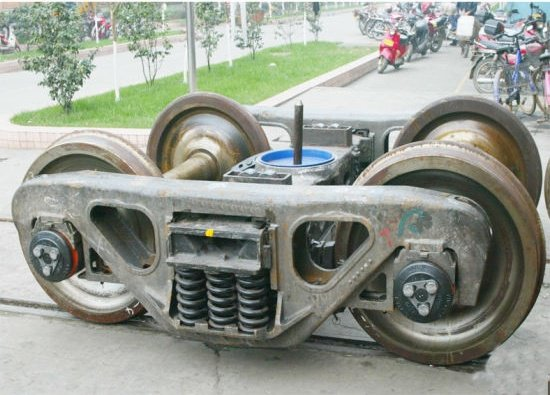

In [ ]:
cv2_imshow(img)

In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


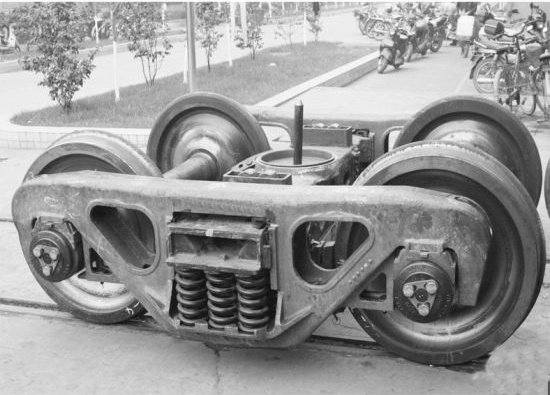

In [ ]:
cv2_imshow(gray)

In [ ]:

# Apply a threshold to segment the object of interest
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)


In [ ]:

# Invert the binary image so that the object of interest is white and the background is black
thresh = cv2.bitwise_not(thresh)


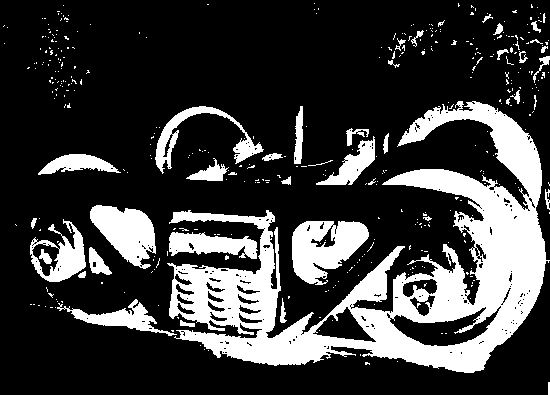

In [ ]:
cv2_imshow(thresh)

In [ ]:

# Save the binary mask
cv2.imwrite('mask.jpg', thresh)


True

In [ ]:
inverted_img = cv2.bitwise_not(thresh)

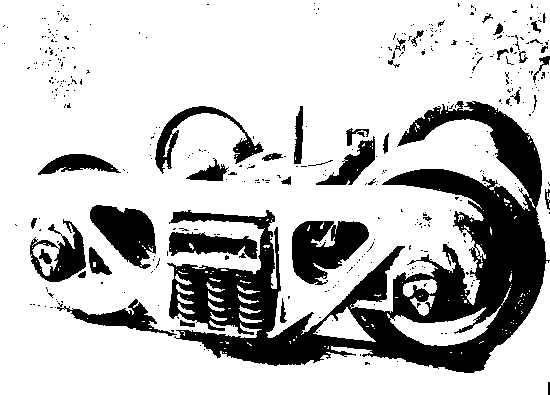

In [ ]:
cv2_imshow(inverted_img)

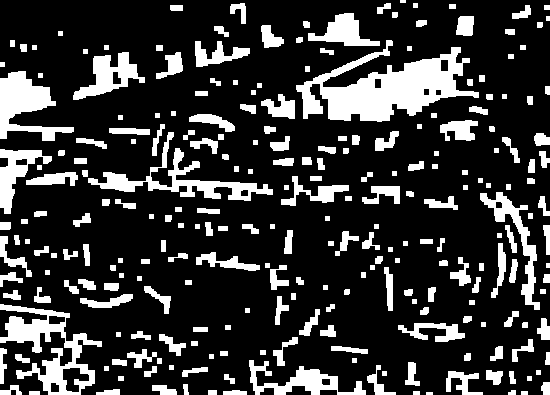

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('bogie.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the object of interest
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply morphological operations to refine the segmentation
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Create a binary mask
mask = closing / 255

# Validate the mask
# ...

# Save the binary mask
# cv2.imwrite('mask.jpg', mask * 255)
cv2_imshow(mask*255)

In [ ]:
from PIL import Image, ImageDraw

# Load the image
image = Image.open('bogie.jpg')

# Create a new blank image with the same size as the original image
mask = Image.new('L', image.size, 0)

# Draw a polygon representing the object in the mask image
draw = ImageDraw.Draw(mask)
draw.polygon([(250,250),(250,250),(250,250),(250,250)], fill=255)

# Save the mask image as a PNG file
mask.save('mask.png')


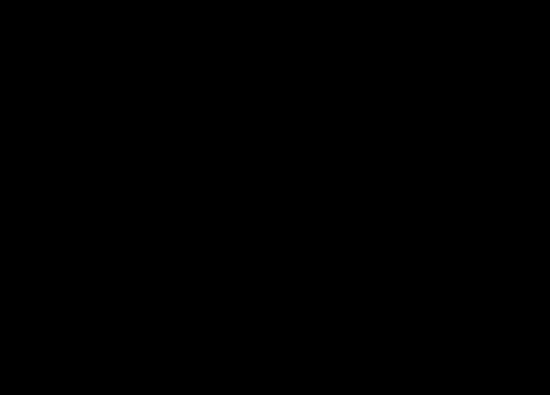

In [ ]:
img1 = cv2.imread('mask.png')
cv2_imshow(img1)

[  0   2   3   4   5   7   9  10  11  12  13  14  16  18  20  22  24  25
  27  28  29  36  41  43  55  56  60  68  69  70  71  74  82  83  85  96
  97  99 100 101 105 110 112 113 115 118 120 122 124 127 128 135 136 138
 141 143 145 148 149 151 152 153 154 156 164 166 168 170 171 173 176 178
 179 180 181 182 183 184 185 186 188 192 193 196 198 199 201 206 207 212
 213 220 221 222 224 225 226 227 228 229 230 231 233 234 235 237 238 239
 240 241 242 244 245 246 247 248 249 251 252 253 255]


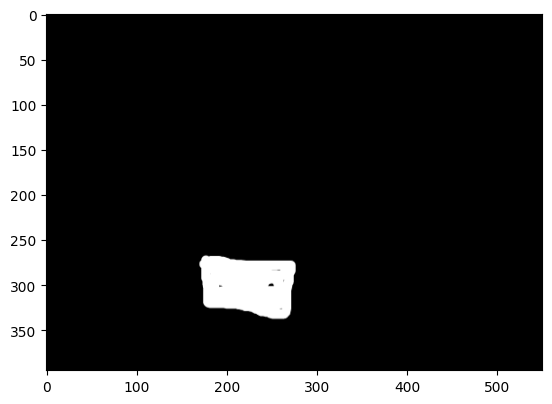

In [ ]:
import os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt


#Loading a png mask image for inspection
test_mask_png = io.imread("/content/task-3-annotation-2-by-1-tag-springs-0.png")
plt.imshow(test_mask_png, cmap='gray')
print(np.unique(test_mask_png))  #This is not a true binary image.


[0 1]


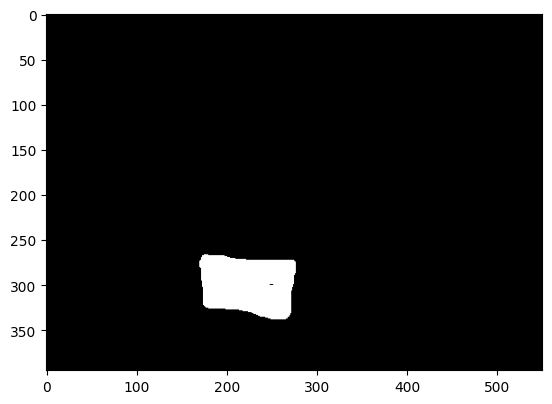

In [ ]:

# #Let us load a numpy array saved from Label Studio
# test_mask_np = np.load("labels_as_numpy/task-9-annotation-6-by-1-tag-Roads-0.npy")
# plt.imshow(test_mask_np, cmap='gray')
# print(np.unique(test_mask_np)) #This is not a true binary image.

#Need to binarize the image. Simple thresholding for values above 0. 
#Convert all values above 0 to 1 to assign a pixel value of 1 for the Houses class.
#Similarly convert other values for other classes to 2, 3, etc. 
my_mask = np.where(test_mask_png>0, 1, test_mask_png)
print(np.unique(my_mask))
plt.imshow(my_mask, cmap='gray')


In [ ]:

#Now, let us read images from all classes and change pixel values to 1, 2, 3, ...
#You can also combine them into a single image (numpy array) for simple handling in future
#(Changing pixel values is optional if you do not intend to combine them into a single array)
#It is better to keep them separate, especially for multilabel segmentation
#where classes can overlap. 

label_folder = "labels_as_png/"
houses_masks = []
roads_masks = []
water_masks = []
wheel_1masks = []

all_masks=[]

for filename in os.listdir(label_folder):
    print(filename)
    if "wheel 1" in filename:
      print(filename)
      wheel_1 = io.imread(label_folder +filename)
      wheel_1 = np.where(wheel_1>0, 1, wheel_1)
      wheel_1masks.append(wheel_1)
    if "wheel 1ghgj" in filename:
        print(filename)
        houses_mask = io.imread(label_folder + filename)
        houses_mask = np.where(houses_mask>0, 1, houses_mask)
        houses_masks.append(houses_mask)
    elif "wheel 2" in filename:
        print(filename)
        roads_mask = io.imread(label_folder + filename)
        roads_mask = np.where(roads_mask>0, 2, roads_mask)
        roads_masks.append(roads_mask)
    elif "springs" in filename:
        print(filename)
        water_mask = io.imread(label_folder + filename)
        water_mask = np.where(water_mask>0, 3, water_mask)
        water_masks.append(water_mask)
    


#Now, convert the list to array and proceed with your work.
#NOTE that you need to resize masks (or crop) to same size to combine them
#into numpy arrays. You need to resize both input images and masks exactly the 
#same way.

task-3-annotation-2-by-1-tag-wheel 1-0.png
task-3-annotation-2-by-1-tag-wheel 1-0.png
task-3-annotation-2-by-1-tag-wheel 2-0.png
task-3-annotation-2-by-1-tag-wheel 2-0.png
task-3-annotation-2-by-1-tag-springs-0.png
task-3-annotation-2-by-1-tag-springs-0.png
task-4-annotation-3-by-1-tag-springs-0.png
task-4-annotation-3-by-1-tag-springs-0.png
task-4-annotation-3-by-1-tag-wheel 1-0.png
task-4-annotation-3-by-1-tag-wheel 1-0.png
task-4-annotation-3-by-1-tag-wheel 2-0.png
task-4-annotation-3-by-1-tag-wheel 2-0.png


In [ ]:
wheel_1masks

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append("..")


ModuleNotFoundError: ignored

In [ ]:
pip install 'git+https://github.com/facebookresearch/segment-anything.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-_pl6624q
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-_pl6624q
  Resolved https://github.com/facebookresearch/segment-anything.git to commit f58f1d1cd1b790b0d5214ae6e80dfbb1d4f19d39
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36582 sha256=8b514195cf90ccf71208a63c7e40bc50582c421e00088de21c1f0a08cf9ca732
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ji9ffhc/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

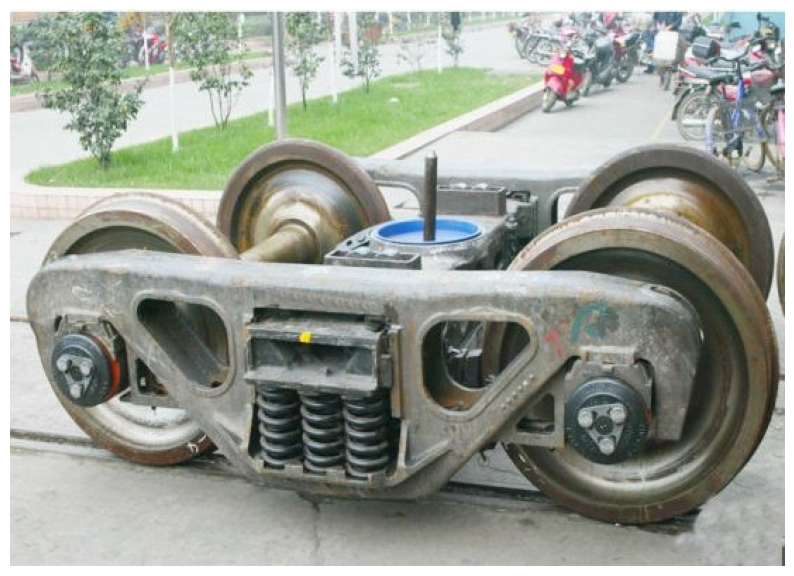

In [ ]:
image = cv2.imread('bogie.jpg')  #Try houses.jpg or neurons.jpg
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
sam_checkpoint = "/content/drive/MyDrive/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.96,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

masks = mask_generator_.generate(image)

print(len(masks))


101


In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


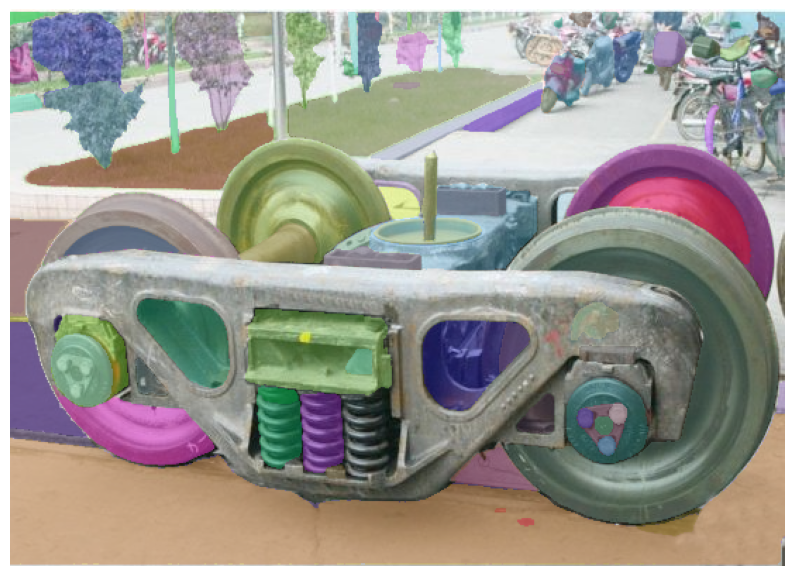

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 